In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime, timedelta

import pandas.io.data as web

In [2]:
end = datetime.now()
start = end + timedelta(weeks=-52)

In [3]:
ctx = web.DataReader('^AXJO', 'yahoo', start, end)

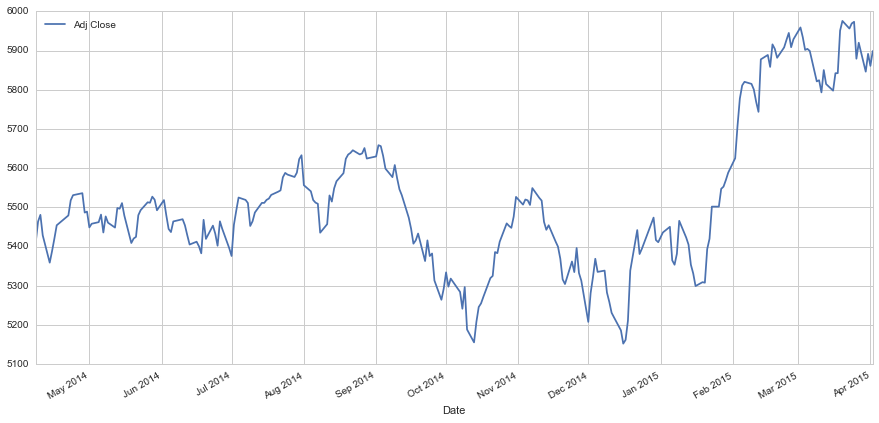

In [4]:
ctx['Adj Close'].plot(legend=True,figsize=(15,7))

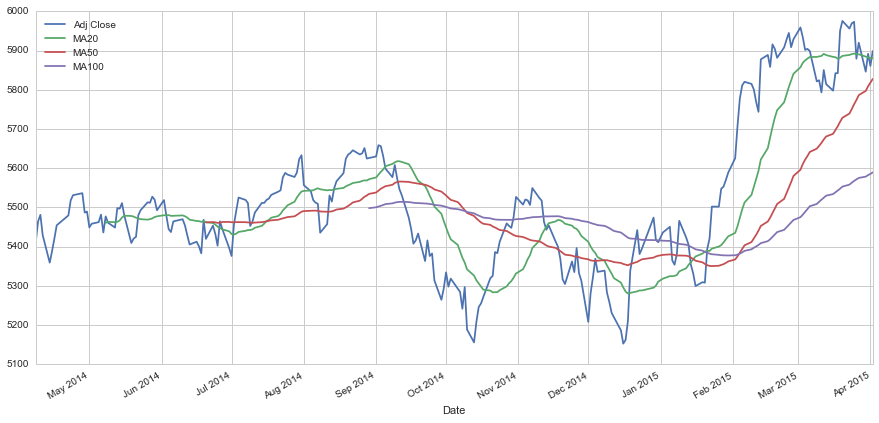

In [5]:
# Calc moving averages

periods = [20, 50, 100]

for p in periods:
    ctx["MA{0}".format(p)] = pd.rolling_mean(ctx['Adj Close'], p)
    
ctx[['Adj Close', 'MA20', 'MA50', 'MA100']].plot(subplots=False, figsize=(15,7))

In [6]:
# Calc Daily Returns

ctx['Daily Return'] = ctx['Adj Close'].pct_change()
ctx['Daily Return'].describe()

count    250.000000
mean       0.000372
std        0.007294
min       -0.020466
25%       -0.004470
50%        0.000556
75%        0.004868
max        0.024526
Name: Daily Return, dtype: float64

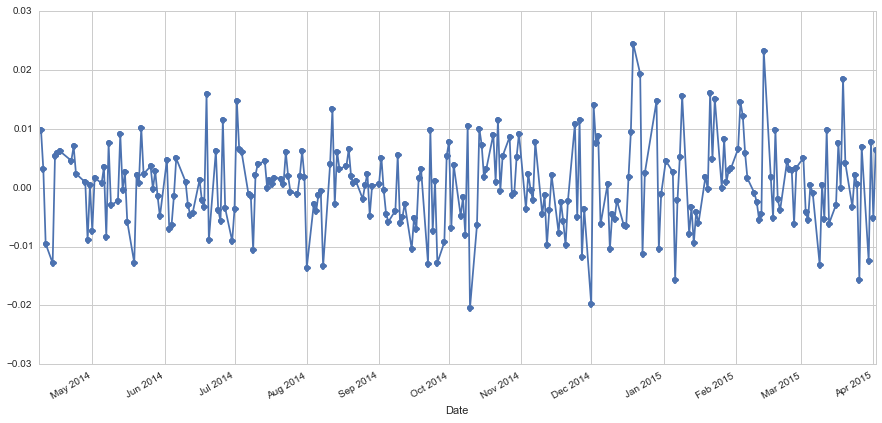

In [7]:
ctx['Daily Return'].plot(figsize=(15,7), marker='o')

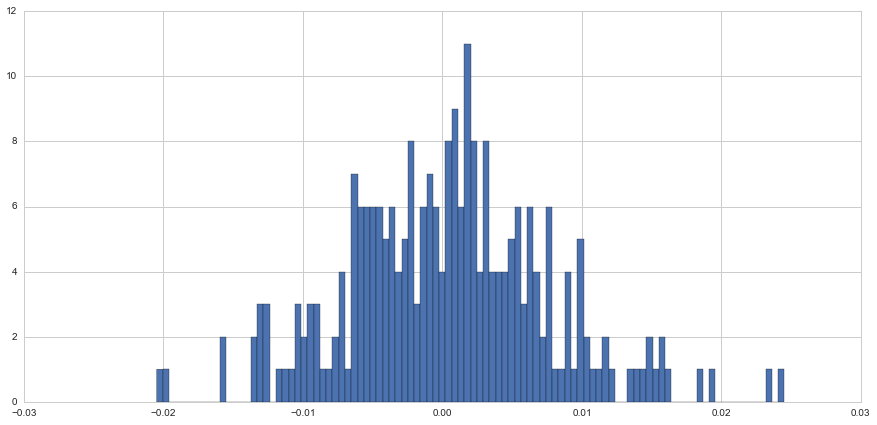

In [8]:
ctx['Daily Return'].hist(figsize=(15,7), bins=100)

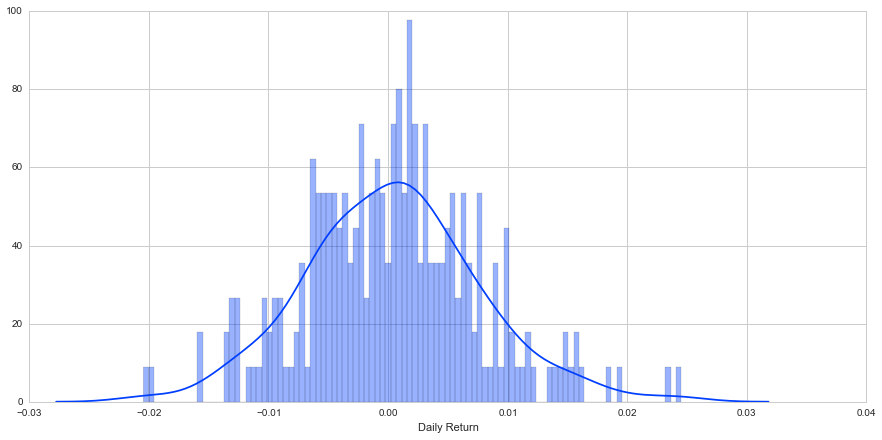

In [9]:
sns.set_palette("bright")
sns.set_context(rc={"figure.figsize": (15, 7)})
sns.distplot(ctx['Daily Return'].dropna(),bins=100)